In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/lava18/google-play-store-apps'
od.download('https://www.kaggle.com/datasets/lava18/google-play-store-apps')

Skipping, found downloaded files in ".\google-play-store-apps" (use force=True to force download)


#### Importing Libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [5]:
df = pd.read_csv("./google-play-store-apps/googleplaystore.csv")
print(f"The shape of the dataset is: {df.shape}")
df.head(n=3)

The shape of the dataset is: (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### Check the categories of each cartegorical column in the dataset


In [6]:
col1 = len(df['Category'].unique())
col6 = len(df['Type'].unique())
col8 = len(df['Content Rating'].unique())
col9 = len(df['Genres'].unique())


print(f"{col1} unique values are present in Category Column [Category]")
print(f"{col6} unique values are present in Type Column [Type]")
print(
    f"{col8} unique values are present in Content Rating Column [Content Rating]")
print(f"{col9} unique values are present in Genres Column [Genres]")


34 unique values are present in Category Column [Category]
4 unique values are present in Type Column [Type]
7 unique values are present in Content Rating Column [Content Rating]
120 unique values are present in Genres Column [Genres]


### Missing Data

Finding the number if missing data from each column and its corresponding percentage

```python
#Code
total= df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df
```

##### Output

| Total |     Percent |
| ----: | ----------: |
|  1474 |    0.135965 |
|     8 | 0.000737939 |
|     3 | 0.000276727 |
|     1 | 9.22424e-05 |
|     1 | 9.22424e-05 |
|     0 |           0 |
|     0 |           0 |
|     0 |           0 |
|     0 |           0 |
|     0 |           0 |
|     0 |           0 |
|     0 |           0 |
|     0 |           0 |


In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df


,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


#### This line of code will remove any rows or columns from the DataFrame that contain at least one missing value and it will also modify the original dataframe.

```python
data.dropna(how ='any', inplace = True)
```

#### After dropping the missing values, check for columns again

```python
#Code
total= df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df
```

|                | Total | Percent |
| :------------- | ----: | ------: |
| App            |     0 |       0 |
| Category       |     0 |       0 |
| Rating         |     0 |       0 |
| Reviews        |     0 |       0 |
| Size           |     0 |       0 |
| Installs       |     0 |       0 |
| Type           |     0 |       0 |
| Price          |     0 |       0 |
| Content Rating |     0 |       0 |
| Genres         |     0 |       0 |
| Last Updated   |     0 |       0 |
| Current Ver    |     0 |       0 |
| Android Ver    |     0 |       0 |


In [8]:
# Dropping the missing values
df.dropna(how='any', inplace=True)


In [9]:
print(f"The shape of the dataset is: {df.shape}")


The shape of the dataset is: (9360, 13)


In [10]:

import plotly.express as px
import pandas as pd
# create the distplot using the column of values between 0 and 5
fig1 = px.histogram(
    df,
    x='Rating',
    nbins=6,
    title='Distribution of Values in Rating Column')
# show the plot
fig1.show()




<br>

> **Finding-1**
>
> - Most users gave an rating between 4 and 5 with a count of 7049
> - Average of rating of application in store is around 4 which is very high

<br>


### Column ["Category"]

#### Get the unique values in the column with its frequency using the below code:

```python
#code
categories=(df['Category'].value_counts())
type(categories) ## to know its structure == Series type
# convert the categories into a dataframe
categories.to_frame()

```

<br>

### Output

| Category            | Count |
| :------------------ | ----: |
| FAMILY              |  1746 |
| GAME                |  1097 |
| TOOLS               |   733 |
| PRODUCTIVITY        |   351 |
| MEDICAL             |   350 |
| COMMUNICATION       |   328 |
| FINANCE             |   323 |
| SPORTS              |   319 |
| PHOTOGRAPHY         |   317 |
| LIFESTYLE           |   314 |
| PERSONALIZATION     |   312 |
| BUSINESS            |   303 |
| HEALTH_AND_FITNESS  |   297 |
| SOCIAL              |   259 |
| SHOPPING            |   238 |
| NEWS_AND_MAGAZINES  |   233 |
| TRAVEL_AND_LOCAL    |   226 |
| DATING              |   195 |
| BOOKS_AND_REFERENCE |   178 |
| VIDEO_PLAYERS       |   160 |
| EDUCATION           |   155 |
| ENTERTAINMENT       |   149 |
| MAPS_AND_NAVIGATION |   124 |
| FOOD_AND_DRINK      |   109 |
| HOUSE_AND_HOME      |    76 |
| WEATHER             |    75 |
| AUTO_AND_VEHICLES   |    73 |
| LIBRARIES_AND_DEMO  |    64 |
| ART_AND_DESIGN      |    61 |
| COMICS              |    58 |
| PARENTING           |    50 |
| EVENTS              |    45 |
| BEAUTY              |    42 |


In [11]:

categories = (df['Category'].value_counts())
# print(categories.to_markdown()) # to get the markdown format
# converting the categories to categories dataframe for accessing easily
categories_df = pd.DataFrame(categories)
# get the list of the counts of the categories
print(list(categories_df['Category'].values))
# get the indices of the categories
print((categories_df.index))


[1746, 1097, 733, 351, 350, 328, 323, 319, 317, 314, 312, 303, 297, 259, 238, 233, 226, 195, 178, 160, 155, 149, 124, 109, 76, 75, 73, 64, 61, 58, 50, 45, 42]
Index(['FAMILY', 'GAME', 'TOOLS', 'PRODUCTIVITY', 'MEDICAL', 'COMMUNICATION',
       'FINANCE', 'SPORTS', 'PHOTOGRAPHY', 'LIFESTYLE', 'PERSONALIZATION',
       'BUSINESS', 'HEALTH_AND_FITNESS', 'SOCIAL', 'SHOPPING',
       'NEWS_AND_MAGAZINES', 'TRAVEL_AND_LOCAL', 'DATING',
       'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS', 'EDUCATION', 'ENTERTAINMENT',
       'MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK', 'HOUSE_AND_HOME', 'WEATHER',
       'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'ART_AND_DESIGN', 'COMICS',
       'PARENTING', 'EVENTS', 'BEAUTY'],
      dtype='object')


### count plot Visualization of the category column


In [12]:
import plotly.graph_objects as go

# Create the data
x = ['FAMILY', 'GAME', 'TOOLS', 'PRODUCTIVITY', 'MEDICAL', 'COMMUNICATION',
     'FINANCE', 'SPORTS', 'PHOTOGRAPHY', 'LIFESTYLE', 'PERSONALIZATION',
     'BUSINESS', 'HEALTH_AND_FITNESS', 'SOCIAL', 'SHOPPING',
     'NEWS_AND_MAGAZINES', 'TRAVEL_AND_LOCAL', 'DATING',
     'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS', 'EDUCATION', 'ENTERTAINMENT',
     'MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK', 'HOUSE_AND_HOME', 'WEATHER',
     'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'ART_AND_DESIGN', 'COMICS',
     'PARENTING', 'EVENTS', 'BEAUTY']
y = [1746, 1097, 733, 351, 350, 328, 323, 319, 317, 314, 312, 303, 297, 259, 238,
     233, 226, 195, 178, 160, 155, 149, 124, 109, 76, 75, 73, 64, 61, 58, 50, 45, 42]


# Create the figure
fig2 = go.Figure(data=[go.Bar(x=y, y=x, orientation='h')])

# Update the layout
fig2.update_layout(
    title='Horizontal Bar Plot Example',
    xaxis_title='Values',
    yaxis_title='Categories',
    width=1000,
    height=1200,
    margin=dict(l=200, r=50, t=100, b=100)

)
# Show the plot
fig2.show()


<br>

> **Finding-2**
>
> - Game and Family category are the most appearances for application in store
> - Beauty and Events are the least most appearances for application in store

<br>


### Category vs Rating


In [13]:
import plotly.express as px
fig3 = px.box(
    df,
    x=df['Category'],
    y=df['Rating'],
    width=1500,
    height=500,
    range_y=[0, 5]
)
fig3.show()




<br>

> **Finding-3**
>
> - The ratings of applications in each category are relatively similar. Above 4

<br>


In [14]:
df.dtypes # check for datatypes of different columns in the dataset

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### If there are changes to be made to the dataset, create a function "preprocessig" and make the preprocessing steps in the function itself.
- These function is usefull to make the preprocessing steps easier at last.


In [15]:
def preprocessing(data):
    data['Reviews'] =data['Reviews'].apply(lambda x: int(x))
    
preprocessing(df)

In [16]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


C:\Users\User\AppData\Local\Temp\ipykernel_9412\766779812.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




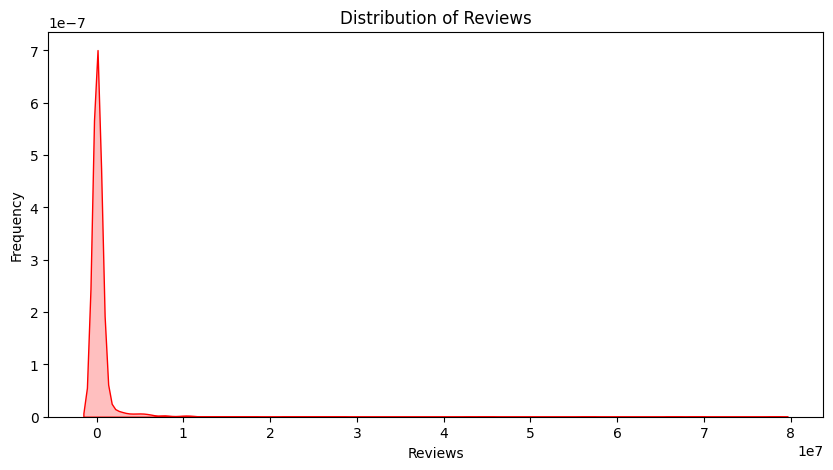

In [17]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Reviews'], shade=True, color="Red")
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.title("Distribution of Reviews")
plt.show()

### Get apps with most reviews   i.e. reviews>50000000

```python
# Selecting rows from the DataFrame where the value in the 'Reviews' column is greater than 50000000.
# Sorting the selected rows in descending order based on the value in the 'Reviews' column.
# Assign the result to a new DataFrame named df_reviews
df_reviews= df[df['Reviews']> 50000000].sort_values(by=["Reviews"], ascending=False)
```

|      | App                                      | Category      |   Rating |   Reviews | Size               | Installs       | Type   |   Price | Content Rating   | Genres        | Last Updated   | Current Ver        | Android Ver        |
|-----:|:-----------------------------------------|:--------------|---------:|----------:|:-------------------|:---------------|:-------|--------:|:-----------------|:--------------|:---------------|:-------------------|:-------------------|
| 2544 | Facebook                                 | SOCIAL        |      4.1 |  78158306 | Varies with device | 1,000,000,000+ | Free   |       0 | Teen             | Social        | August 3, 2018 | Varies with device | Varies with device |
| 3943 | Facebook                                 | SOCIAL        |      4.1 |  78128208 | Varies with device | 1,000,000,000+ | Free   |       0 | Teen             | Social        | August 3, 2018 | Varies with device | Varies with device |
|  336 | WhatsApp Messenger                       | COMMUNICATION |      4.4 |  69119316 | Varies with device | 1,000,000,000+ | Free   |       0 | Everyone         | Communication | August 3, 2018 | Varies with device | Varies with device |
|  381 | WhatsApp Messenger                       | COMMUNICATION |      4.4 |  69119316 | Varies with device | 1,000,000,000+ | Free   |       0 | Everyone         | Communication | August 3, 2018 | Varies with device | Varies with device |
| 3904 | WhatsApp Messenger                       | COMMUNICATION |      4.4 |  69109672 | Varies with device | 1,000,000,000+ | Free   |       0 | Everyone         | Communication | August 3, 2018 | Varies with device | Varies with device |
| 2604 | Instagram                                | SOCIAL        |      4.5 |  66577446 | Varies with device | 1,000,000,000+ | Free   |       0 | Teen             | Social        | July 31, 2018  | Varies with device | Varies with device |
| 2545 | Instagram                                | SOCIAL        |      4.5 |  66577313 | Varies with device | 1,000,000,000+ | Free   |       0 | Teen             | Social        | July 31, 2018  | Varies with device | Varies with device |
| 2611 | Instagram                                | SOCIAL        |      4.5 |  66577313 | Varies with device | 1,000,000,000+ | Free   |       0 | Teen             | Social        | July 31, 2018  | Varies with device | Varies with device |
| 3909 | Instagram                                | SOCIAL        |      4.5 |  66509917 | Varies with device | 1,000,000,000+ | Free   |       0 | Teen             | Social        | July 31, 2018  | Varies with device | Varies with device |
|  382 | Messenger – Text and Video Chat for Free | COMMUNICATION |      4   |  56646578 | Varies with device | 1,000,000,000+ | Free   |       0 | Everyone         | Communication | August 1, 2018 | Varies with device | Varies with device |
|  335 | Messenger – Text and Video Chat for Free | COMMUNICATION |      4   |  56642847 | Varies with device | 1,000,000,000+ | Free   |       0 | Everyone         | Communication | August 1, 2018 | Varies with device | Varies with device |
| 4104 | Messenger – Text and Video Chat for Free | COMMUNICATION |      4   |  56642847 | Varies with device | 1,000,000,000+ | Free   |       0 | Everyone         | Communication | August 1, 2018 | Varies with device | Varies with device |

In [18]:
df_reviews= df[df['Reviews']> 50000000].sort_values(by=["Reviews"], ascending=False)
df_reviews_1=pd.DataFrame(df_reviews["App"].value_counts())
df_reviews_1

,App
Instagram,4
WhatsApp Messenger,3
Messenger – Text and Video Chat for Free,3
Facebook,2


In [19]:
## Visualization from the above information
#print(df_reviews_1.index)

import plotly.express as px
labels= ['Instagram', 'WhatsApp Messenger',
       'Messenger – Text and Video Chat for Free', 'Facebook']
values=[4,3,3,2]
fig4= px.pie(labels, values=values, names= labels, hole=0.5)
fig4.show()

> Finding-4 
> <br>
> Most of application in this store have less than 1M in reviews.
> Obviously, well-known applictions have a lot of reviews

In [20]:
import plotly.graph_objs as go

reviews= list(df["Reviews"])
ratings= list(df["Rating"])


# Create the scatter plot
data = [go.Scatter(x=reviews, y=ratings, mode='markers')]


# Create the layout
layout = go.Layout(title='Reviews vs Ratings',
                   xaxis=dict(title='Reviews', range=[0,10000000]),
                   yaxis=dict(title='Ratings'),
                   width=1000,
                   height=800
                
                   )

fig5 = go.Figure(data=data, layout=layout)

fig5.show()


> Finding-5
> <br>
> Seem like well-known application will get a good rating

In [21]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Installs

In [22]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [23]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

#### converting the object type to integer type

In [24]:
df['Installs']=df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs']= df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs']= df['Installs'].apply(lambda x: int(x))

In [25]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

In [26]:
sorted_value= sorted(list(df['Installs'].unique()))
df['Installs'].replace(sorted_value,range(0,len(sorted_value),1), inplace = True )

In [27]:
sorted_value

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

<Axes: xlabel='Installs', ylabel='Rating'>

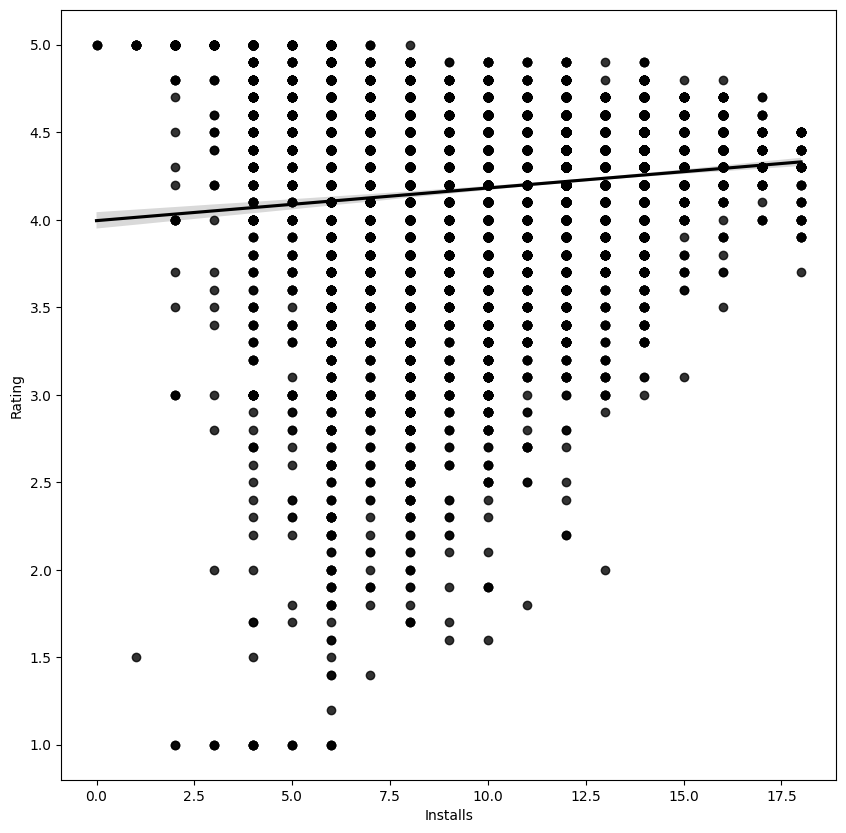

In [28]:
plt.figure(figsize=(10,10))
sns.regplot(x='Installs', y='Rating', color='black', data=df)


> Finding-6
> <br>
> Seem like number of install affect to rating

## Type


In [29]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [30]:
df['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

In [31]:
import chart_studio
import chart_studio.plotly as py
username= 'amansinganamala'
api_key= 'yaQI32JTF9qINCBX7nGB'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [32]:
py.plot(fig1, filename = 'corr_sales_data', auto_open=True)

'https://plotly.com/~amansinganamala/7/'

In [33]:
py.plot(fig2, filename = 'sin_fig2', auto_open=True)

'https://plotly.com/~amansinganamala/14/'

In [34]:
py.plot(fig3, filename = 'sin_fig3', auto_open=True)

'https://plotly.com/~amansinganamala/16/'

In [35]:
py.plot(fig4, filename = 'sin_fig4', auto_open=True)

'https://plotly.com/~amansinganamala/18/'

In [36]:
py.plot(fig5, filename = 'sin_fig5', auto_open=True)